In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import os
import pickle
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [4]:
text=[]
cat=[]

In [5]:
angry=[]
base_path="D:/Projects/Data/angry/"
for i in range(130):
  filename=str(i)+'.txt'
  path_to_file=os.path.join(base_path,filename)
  fd=pd.read_csv(path_to_file)
  angry.append(list(fd.columns))

for item in angry:
  text.append(item[0])
  cat.append(0)

In [6]:
happy=[]
base_path="D:/Projects/Data/happy/"
for i in range(151):
  filename=str(i)+'.txt'
  path_to_file=os.path.join(base_path,filename)
  fd=pd.read_csv(path_to_file)
  happy.append(list(fd.columns))

for item in happy:
  text.append(item[0])
  cat.append(1)

In [7]:
neutral=[]
base_path="D:/Projects/Data/neutral/"
for i in range(128):
  filename=str(i)+'.txt'
  path_to_file=os.path.join(base_path,filename)
  fd=pd.read_csv(path_to_file)
  neutral.append(list(fd.columns))

for item in neutral:
  text.append(item[0])
  cat.append(2)

In [8]:
sad=[]
base_path="D:/Projects/Data/sad/"
for i in range(104):
  filename=str(i)+'.txt'
  path_to_file=os.path.join(base_path,filename)
  fd=pd.read_csv(path_to_file)
  sad.append(list(fd.columns))

for item in sad:
  text.append(item[0])
  cat.append(3)

In [9]:
print(len(text))
print(len(cat))

513
513


In [10]:
df=pd.DataFrame(data=[text,cat])
df=df.T
df.rename(columns={0:'Text',1:'Class'},inplace=True)
df['Class']=df['Class'].astype(int)
df.head()

,Text,Class
0,मेरे ट्रैन का बुकिंग फेल हो रहा है बार बार,0
1,मेरे फ्लाइट का बुकिंग फेल हो रहा है बार बार,0
2,बहुत ही घटिया एप्प है तुम्हारा,0
3,मेरी कैब क्यों नहीं आ रही है,0
4,बहुत ही बकवास वेबसाइट है तुम्हारा भाई,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    513 non-null    object
 1   Class   513 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 6.1+ KB


In [12]:
stop = ['',' ',' ','!','! ','!  ','! !','! ! ','! ! !','?','ही','तुमसे','बार','आप','तुम्हारे','तु','रहा','कुछ','कभी','एक','तुम','होता','नहीं','कितनी','पर','तू','हो','है','क्यों','एप','कर','काम','रहे','बातें','लग','आता','ये चैनल्स','करनी','अपना','पैक्स','चीज़','क्या','अरे ये','करा','मैं']

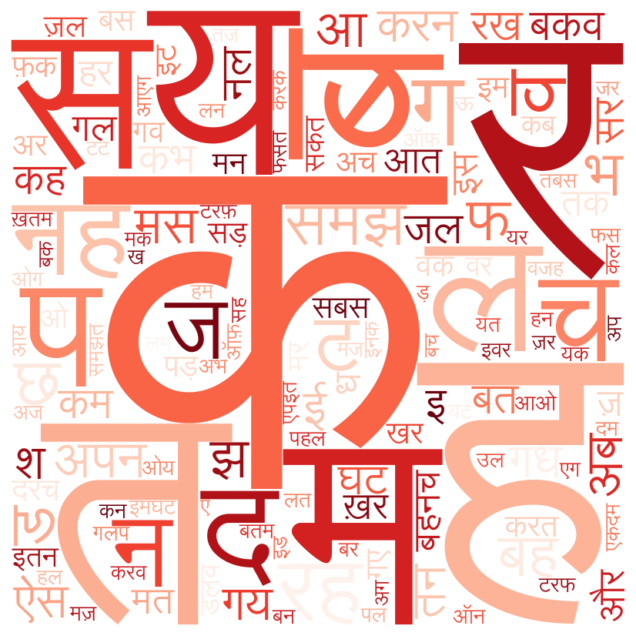

In [13]:
wc=WordCloud(width=800,height=800,colormap='Reds',stopwords=stop,background_color='white',min_font_size=10,font_path='./font/Lohit-Devanagari.ttf',collocations=False)
wc.generate(''.join(df[df['Class']==0]['Text']))
plt.figure(figsize=(8,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

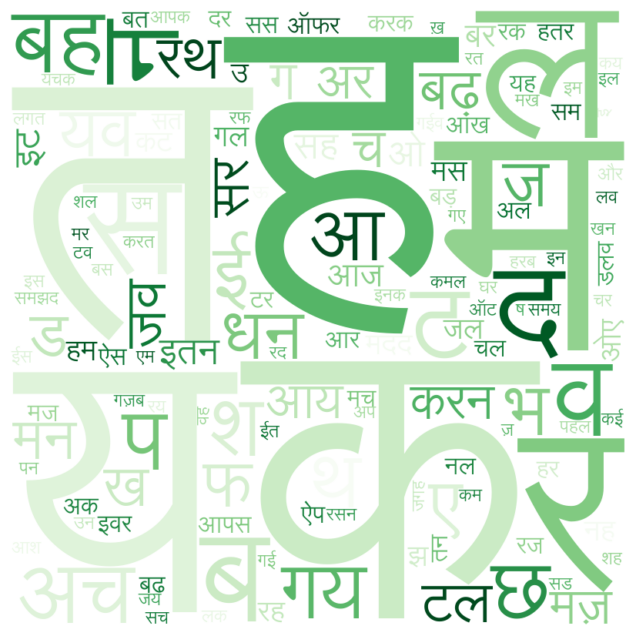

In [14]:

wc=WordCloud(width=800,height=800,colormap='Greens',stopwords=stop,background_color='white',min_font_size=10,font_path='./font/Lohit-Devanagari.ttf',collocations=False)
wc.generate(''.join(df[df['Class']==1]['Text']))
plt.figure(figsize=(8,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

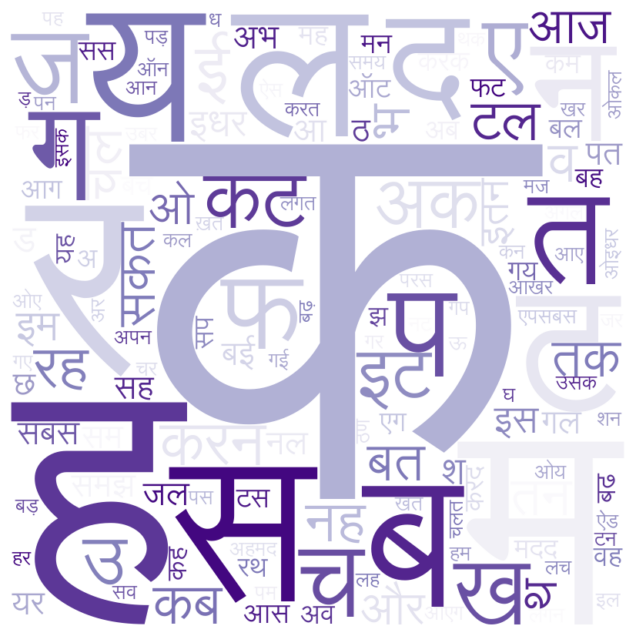

In [15]:
wc=WordCloud(width=800,height=800,colormap='Purples',stopwords=stop,background_color='white',min_font_size=10,font_path='./font/Lohit-Devanagari.ttf',collocations=False)
wc.generate(''.join(df[df['Class']==2]['Text']))
plt.figure(figsize=(8,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

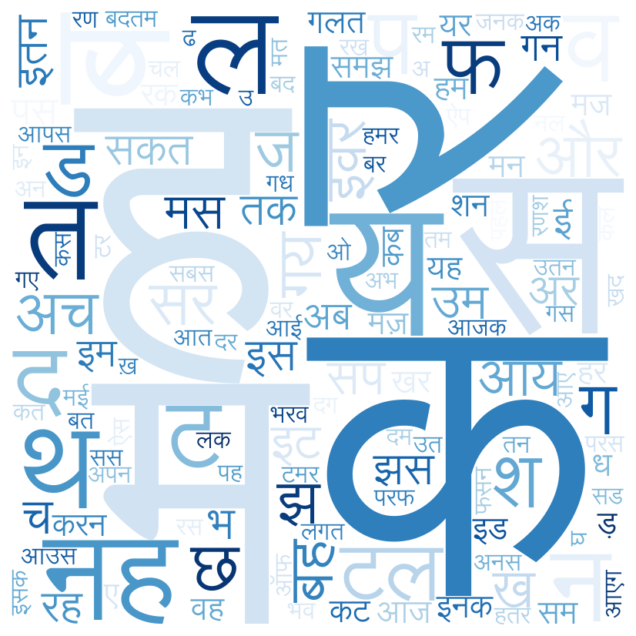

In [16]:
wc=WordCloud(width=800,height=800,colormap='Blues',stopwords=stop,background_color='white',min_font_size=10,font_path='./font/Lohit-Devanagari.ttf',collocations=False)
wc.generate(''.join(df[df['Class']==3]['Text']))
plt.figure(figsize=(8,8))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
df.groupby('Class').count()

,Text
Class,
0,130
1,151
2,128
3,104


In [18]:
x=df['Text']
y=df['Class']

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=48,test_size=0.33)

In [20]:
def my_tokenizer(s):
  return s.split(' ')

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(encoding="ISCII",stop_words=stop, tokenizer=my_tokenizer)

In [22]:
xtrain_cv=cv.fit_transform(xtrain)
xtest_cv=cv.transform(xtest)

In [23]:
from sklearn.metrics import classification_report

In [24]:
from sklearn.naive_bayes import MultinomialNB
mn=MultinomialNB(alpha=0.7)
mn.fit(xtrain_cv,ytrain)

MultinomialNB(alpha=0.7)

In [25]:
ypred=mn.predict(xtest_cv)
target_names=['angry', 'happy', 'neutral', 'sad']

In [26]:
print(classification_report(ytest,ypred,target_names=target_names))

              precision    recall  f1-score   support

       angry       0.74      0.68      0.70        37
       happy       0.76      0.75      0.76        52
     neutral       0.89      0.75      0.82        53
         sad       0.55      0.79      0.65        28

    accuracy                           0.74       170
   macro avg       0.73      0.74      0.73       170
weighted avg       0.76      0.74      0.75       170

